Ask for the HathiTrust ID of the text

In [3]:
htid = input("HathiTrust ID")

Connect to the API and get features for the text

In [4]:
import http.client
import json

conn = http.client.HTTPSConnection("data.htrc.illinois.edu")

headers = { 'Accept': "application/json" }

conn.request("GET", "/ef-api/volumes/" + htid, headers=headers)

res = conn.getresponse()
data = json.loads(res.read().decode("utf-8"))

Ask for the starting and ending pages and adjust to 0 or last page, respectively, if enter was pressed

In [5]:
start_page = input("Starting page (enter for 0)")
end_page = input("Ending page (enter for last page)")

page_count = data["data"]["features"]["pageCount"]

if start_page == "":
    start_page = str(0)

if end_page == "":
    end_page = str(page_count)

if int(end_page) > page_count:
    end_page = str(page_count)

start_page = start_page.zfill(8)
end_page = end_page.zfill(8)

Add NNP, NNPS, NN, and NNS tokens to our lists

In [6]:
proper_nouns = []
regular_nouns = []

pages = data["data"]["features"]["pages"]

for page in pages:
    if page["seq"] > end_page:
        break

    if page["seq"] < start_page:
        continue

    if page is None or page["body"] is None:
        continue 
       
    pos_count = page["body"]["tokenPosCount"]

    for key in pos_count.keys():
        if pos_count[key].get('NNP') is not None or pos_count[key].get('NNPS') is not None:
            proper_nouns.append(key.lower())
        if pos_count[key].get('NN') is not None or pos_count[key].get('NNS') is not None:
            regular_nouns.append(key.lower())            

Convert lists of tokens to counts

In [7]:
from collections import Counter
counts = Counter(proper_nouns)
regular_counts = Counter(regular_nouns)

Display word cloud of proper nouns

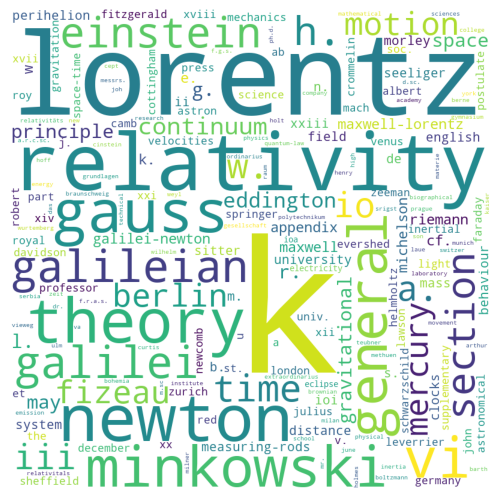

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(counts)
 
plt.figure(facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Display word cloud of common nouns

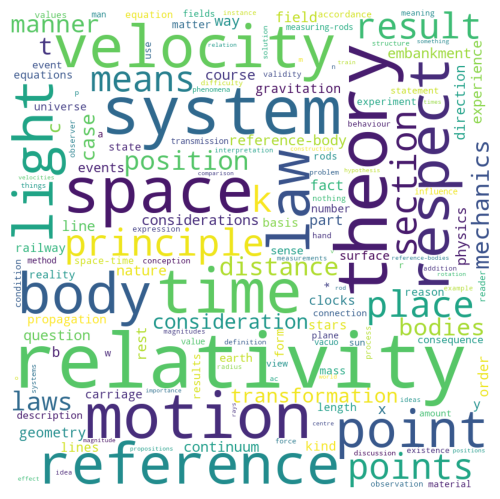

In [9]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(regular_counts)
 
plt.figure(facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()